In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:09<00:00, 141MB/s]
100% 1.06G/1.06G [00:09<00:00, 118MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 109ms/step - loss: 1.7257 - accuracy: 0.5781 - val_loss: 0.6429 - val_accuracy: 0.6130
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.6098 - accuracy: 0.6621 - val_loss: 0.6903 - val_accuracy: 0.6216
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5455 - accuracy: 0.7102 - val_loss: 0.5142 - val_accuracy: 0.7104
Epoch 4/10
625/625 [==============================] - 68s 107ms/step - loss: 0.4851 - accuracy: 0.7581 - val_loss: 0.5470 - val_accuracy: 0.7244
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4385 - accuracy: 0.7890 - val_loss: 0.5370 - val_accuracy: 0.7588
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3920 - accuracy: 0.8137 - val_loss: 0.4408 - val_accuracy: 0.8038
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3400 - accuracy: 0.8429 - val_loss: 0.5833 - val_ac

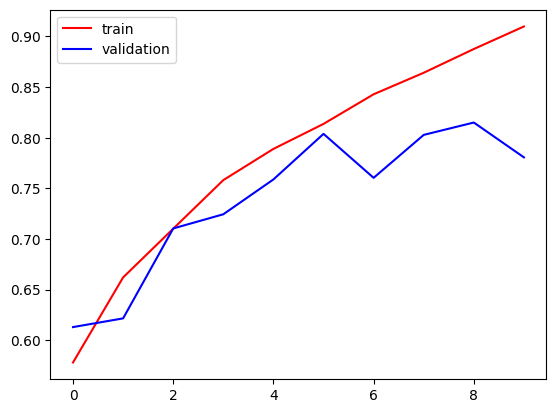

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

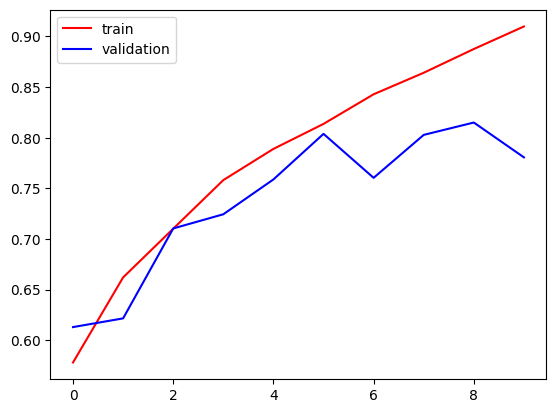

In [12]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

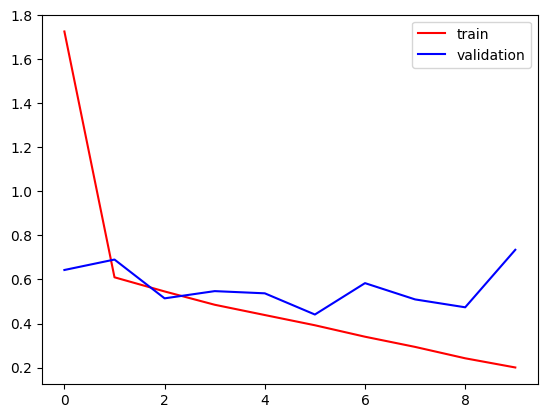

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

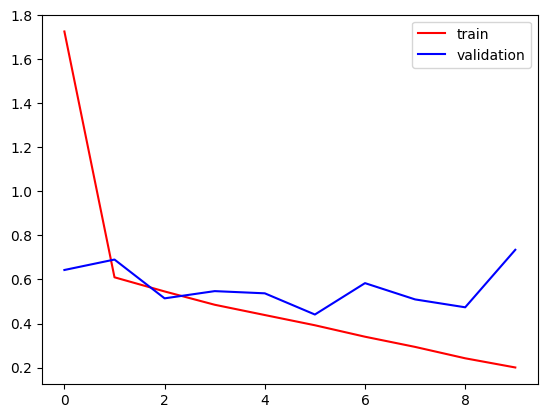

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
import cv2

In [16]:
test_img = cv2.imread('/content/cat.png')

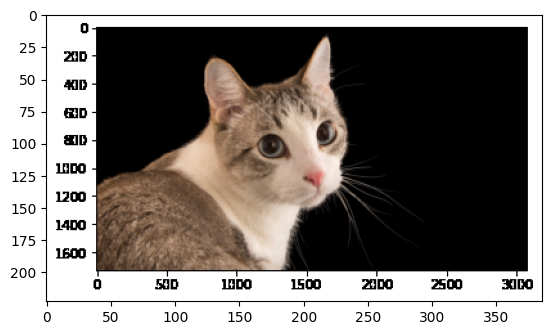

In [17]:
plt.imshow(test_img)

In [18]:
test_img.shape

(223, 386, 3)

In [19]:
test_img = cv2.resize(test_img,(256,256))

In [20]:
test_input = test_img.reshape((1,256,256,3))

In [22]:
model.predict(test_input)

1/1 [==============================] - 0s 29ms/step


array([[0.]], dtype=float32)

In [23]:
test_img2 = cv2.imread('/content/dog.jpeg')

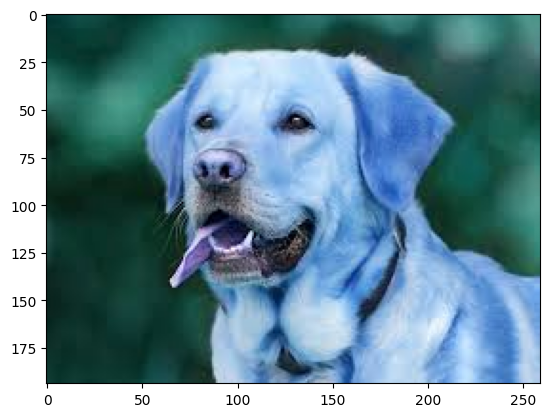

In [24]:
plt.imshow(test_img2)

In [25]:
test_img2.shape

(194, 259, 3)

In [26]:
test_img2 = cv2.resize(test_img2,(256,256))

In [27]:
test_input2 = test_img2.reshape((1,256,256,3))

In [29]:
model.predict(test_input2)

1/1 [==============================] - 0s 29ms/step


array([[1.]], dtype=float32)

In [39]:
model2 = load_model('/content/drive/MyDrive/Cat-Dog Classification.h5')

In [33]:
test_img3 = cv2.imread('/dog2.jpeg')

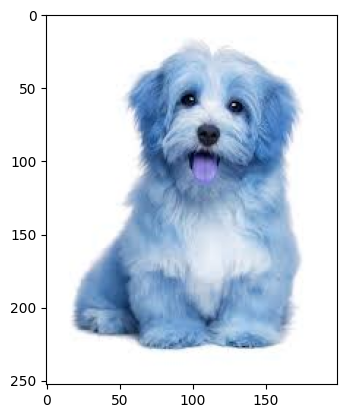

In [34]:
plt.imshow(test_img3)

In [36]:
test_img3.shape

(253, 199, 3)

In [37]:
test_img3 = cv2.resize(test_img3,(256,256))

In [38]:
test_input3 = test_img3.reshape((1,256,256,3))

In [40]:
model2.predict(test_input3)

1/1 [==============================] - 0s 191ms/step


array([[1.]], dtype=float32)